-- Cargar en dataframes los archivos Netflix.csv con películas y Rating.csv con las categorías.
-- Al dataframe de peliculas combinarle por id_rate, los nombres de las categorías.
-- Eliminar las columnas con valores NaN.
-- Eliminar las columnas Description y id_rating.
-- Cual es la categoría mas frecuente de Film.
-- Listar la cantidad de películas por año de lanzamiento.
-- Lista de los titulos con Categoría NaN.
* Listar la cantidad de películas de cada Categoría.
* Listar de las 20 temáticas mas populares entre todos los registros.
* Listar los años que tuvieron entre 20 y 30 lanzamientos de solo Drama o solo Kids' TV ordenado por año.
* Realizar una tabla que compare las temáticas "Drama", "Comedia" y "Documentales" comparando la cantidad de lanzamientos en los últimos 5 años.
* Realizar un gráfico de barras comparativo del punto anterior, agregar Título, etiquetas de los ejes valores en las columnas, leyenda superior derecha y grilla horizontal con lineas de puntos.
* Graficar comparativa entre los tipos de contenido desde 2015, marcar el punto maximo de TV Show con una etiqueta, sin spins superior ni derecho, marcar cada serie con distintos marcadores, tipo de linea y colores.

In [89]:
import pandas as pd
net=pd.read_csv("Netflix.csv")
rat=pd.read_csv("Rating.csv")

Uni=net.join(rat,on=("id_rating"))
Uni = Uni.drop(columns=['director','cast','country','date_added','duration','description','id_rating'])
print(Uni.columns)

Index(['show_id', 'type', 'title', 'release_year', 'listed_in', 'rating'], dtype='object')


In [14]:
moda=Uni.listed_in.mode()
moda
Uni.groupby('release_year')["show_id"].count().reset_index()

,release_year,show_id
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


In [15]:
Uni[Uni.rating.isna()]

,show_id,type,title,release_year,listed_in,rating
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,2017,Movies,NaN
6827,s6828,TV Show,Gargantia on the Verdurous Planet,2013,"Anime Series, International TV Shows",NaN
7312,s7313,TV Show,Little Lunch,2015,"Kids' TV, TV Comedies",NaN
7537,s7538,Movie,My Honor Was Loyalty,2015,Dramas,NaN


In [16]:
categPopu=Uni.groupby(by='listed_in')["title"].count()
categPopu.reset_index()

,listed_in,title
0,Action & Adventure,128
1,"Action & Adventure, Anime Features",1
2,"Action & Adventure, Anime Features, Children &...",4
3,"Action & Adventure, Anime Features, Classic Mo...",2
4,"Action & Adventure, Anime Features, Horror Movies",1
...,...,...
509,"TV Horror, TV Mysteries, Teen TV Shows",1
510,"TV Horror, Teen TV Shows",2
511,"TV Sci-Fi & Fantasy, TV Thrillers",1
512,TV Shows,16


In [17]:
Uni.groupby('listed_in').count().sort_values("title",ascending=False).head(20)

,show_id,type,title,release_year,rating
listed_in,,,,,
"Dramas, International Movies",362,362,362,362,362
Documentaries,359,359,359,359,359
Stand-Up Comedy,334,334,334,334,334
"Comedies, Dramas, International Movies",274,274,274,274,274
"Dramas, Independent Movies, International Movies",252,252,252,252,252
Kids' TV,220,220,220,220,220
Children & Family Movies,215,215,215,215,215
"Children & Family Movies, Comedies",201,201,201,201,201
"Documentaries, International Movies",186,186,186,186,186


In [18]:
x=Uni.loc[(Uni['listed_in'] == "Drama") | (Uni['listed_in'] == "Kids' TV")].groupby(by="release_year").count()
x.loc[(x["title"] > 20)&(x["title"] < 30)].sort_index()


,show_id,type,title,listed_in,rating
release_year,,,,,
2016,28,28,28,28,28
2017,24,24,24,24,24
2019,28,28,28,28,28
2020,22,22,22,22,22
2021,24,24,24,24,24


In [19]:
gener=Uni.drop(columns=["type","title","show_id","rating"])
gener=gener.query("release_year >= 2017")

drama=gener.loc[(gener['listed_in'] == "Dramas")].groupby("release_year").count().reset_index()
drama.rename(columns={"listed_in":"Dramas"},inplace=True)

docu=gener.loc[(gener['listed_in'] == "Documentaries")].groupby("release_year").count().reset_index()
docu.rename(columns={"listed_in":"Documentaries"},inplace=True)

comed=gener.loc[(gener['listed_in'] == "Comedies")].groupby("release_year").count().reset_index()
comed.rename(columns={"listed_in":"Comedies"},inplace=True)

compar=compar= pd.concat([drama.set_index('release_year'), docu.set_index('release_year'), comed.set_index('release_year')], axis=1)
compar=compar
compar

,Dramas,Documentaries,Comedies
release_year,,,
2017,19,89,13
2018,11,54,12
2019,17,33,14
2020,12,23,10
2021,6,20,4


<Axes: xlabel='release_year'>

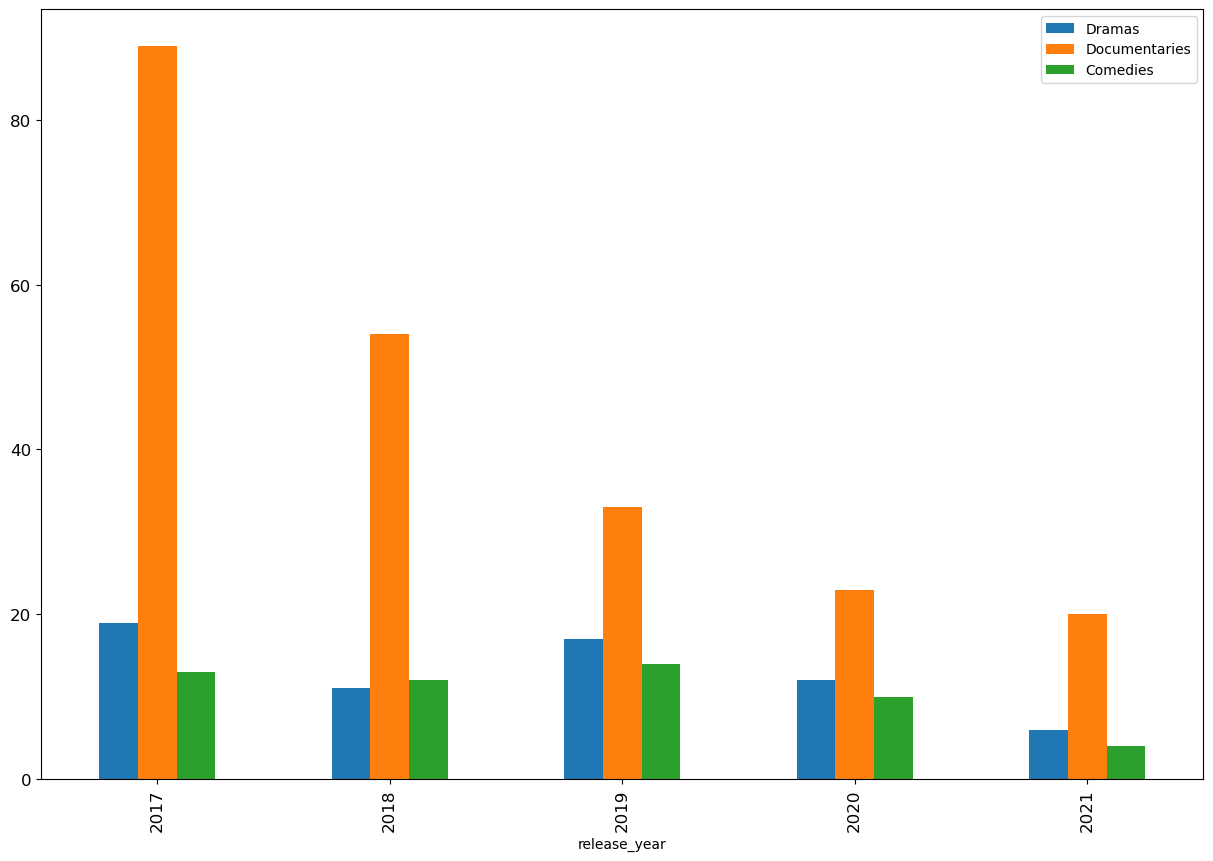

In [20]:
compar.plot(kind='bar', title ="", figsize=(15, 10), legend=True, fontsize=12)

Text(0.5, 0, 'Años')

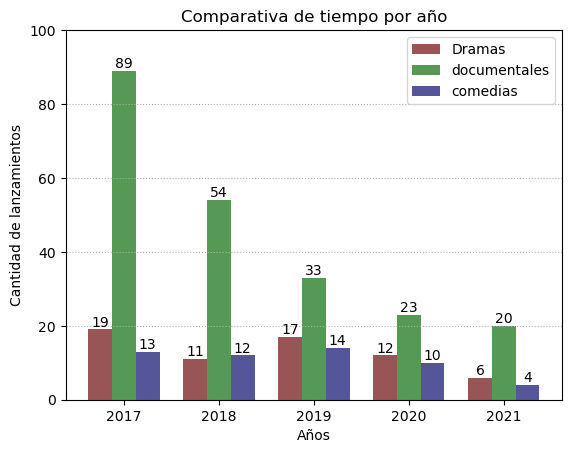

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
anc=0.25
x=np.arange(len(compar.index))
dram=ax.bar(x-anc,compar.Dramas,anc,color="#995555",label='Dramas')
doc=ax.bar(x,compar.Documentaries,anc,color="#559955",label='documentales')
com=ax.bar(x+anc,compar.Comedies,anc,color="#555599",label='comedias')
ax.legend(loc="upper right")
ax.grid(axis='y', linestyle=':')
ax.set_xticks(x,compar.index)
ax.bar_label(dram)
ax.bar_label(doc)
ax.bar_label(com)
ax.set_ylim(0,100)
ax.set_title("Comparativa de tiempo por año")
ax.set_ylabel("Cantidad de lanzamientos")
ax.set_xlabel("Años")

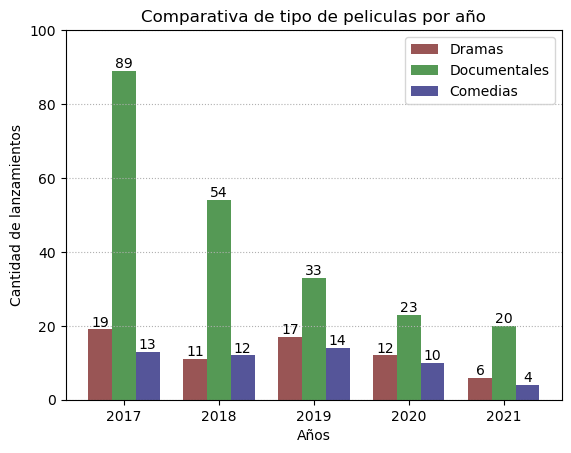

In [77]:
elpetedeflor=Uni.drop(columns=["show_id","title","listed_in","rating"])
elpetedeflor=elpetedeflor.query("release_year >= 2015")
pelis=elpetedeflor[elpetedeflor["type"] == "Movie"]
pelis=pelis.groupby(by="release_year").count().reset_index()

serie=elpetedeflor[elpetedeflor["type"] == "TV Show"]
serie=serie.groupby(by="release_year").count().reset_index()
serie['release_year'] = pd.to_datetime(serie['release_year'], format='%Y')


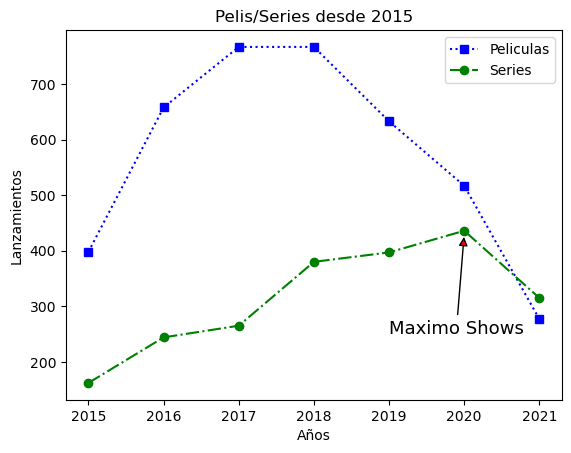

In [90]:
fig, ax = plt.subplots()
plt.plot(pelis.release_year,pelis.type, label='Peliculas', color='b', linestyle=':', marker='s' )
plt.plot(pelis.release_year,serie.type, linestyle='-.', color='g',  marker='o', label='Series')

plt.legend(loc='upper right')
plt.title("Pelis/Series desde 2015")
plt.ylabel("Lanzamientos")
plt.xlabel("Años")
plt.annotate('Maximo Shows',(2020,430),xytext=(2019,250), fontsize=13, arrowprops=dict(arrowstyle="-|>", facecolor='red'))
plt.show()

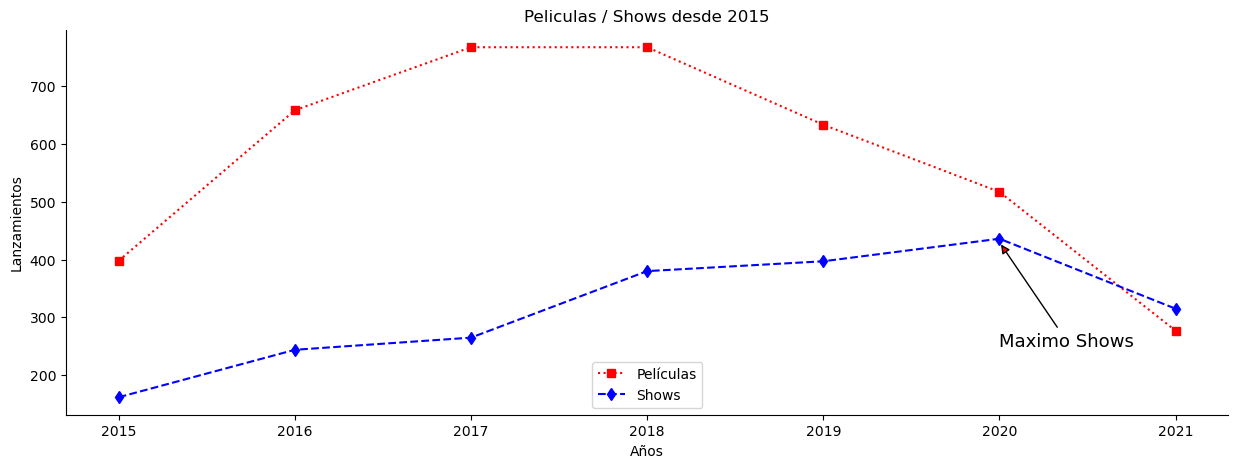